In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as splt
from google.cloud import storage

In [76]:
df = pd.read_csv('Data-ML_gcp.csv', sep=';')
df.head()

,Pais,Continente,Anio,Valor,Indicador
0,Australia,Oceania,1987,8.533022,"Inflation, consumer prices (annual %)"
1,Australia,Oceania,1988,7.215940,"Inflation, consumer prices (annual %)"
2,Australia,Oceania,1989,7.533903,"Inflation, consumer prices (annual %)"
3,Australia,Oceania,1990,7.333022,"Inflation, consumer prices (annual %)"
4,Australia,Oceania,1991,3.176675,"Inflation, consumer prices (annual %)"


In [77]:
df.rename(columns={'Anio': 'Año'}, inplace=True)

In [78]:
df_pivot = pd.pivot_table(data=df, index=['Pais', "Año",'Continente'], columns='Indicador', values='Valor')
df_pivot.reset_index(inplace=True)
df_pivot

Indicador,Pais,Año,Continente,GDP per capita (current US$),GDP per capita growth (annual %),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",...,"Population ages 65 and above, male","Population ages 65 and above, total",Population growth (annual %),"Population, female","Population, male","Population, total",Rural population,Rural population growth (annual %),Urban population,Urban population growth (annual %)
0,Afghanistan,1987,Asia,NaN,NaN,NaN,NaN,43.453000,36.739000,39.844000,...,111022.0,233845.0,-1.210190,5152650.0,5170108.0,10322758.0,8225793.0,-2.043746,2096965.0,2.128391
1,Afghanistan,1988,Asia,NaN,NaN,NaN,NaN,46.569000,41.572000,43.958000,...,110633.0,233853.0,0.586318,5188060.0,5195399.0,10383460.0,8203141.0,-0.275758,2180319.0,3.898014
2,Afghanistan,1989,Asia,NaN,NaN,NaN,NaN,47.610000,42.891000,45.158000,...,113325.0,240097.0,2.751877,5334609.0,5338559.0,10673168.0,8422410.0,2.637888,2250758.0,3.179585
3,Afghanistan,1990,Asia,NaN,NaN,NaN,NaN,48.397000,43.709000,45.967000,...,113182.0,240267.0,0.202434,5346409.0,5348387.0,10694796.0,8429959.0,0.089590,2264837.0,0.623574
4,Afghanistan,1991,Asia,NaN,NaN,NaN,NaN,49.144000,44.353000,46.663000,...,113494.0,241354.0,0.469880,5372208.0,5372959.0,10745167.0,8460100.0,0.356909,2285067.0,0.889255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,Venezuela,2018,Sudamérica,6084.479996,0.631865,35.063119,NaN,76.431000,67.832000,71.979000,...,925706.0,2151240.0,-2.443543,15021517.0,14804135.0,29825653.0,3517041.0,-2.655330,26308612.0,-2.415197
1580,Venezuela,2019,Sudamérica,6084.479996,0.631865,35.063119,NaN,76.566000,68.034000,72.161000,...,944115.0,2208384.0,-2.904996,14605811.0,14365872.0,28971683.0,3407070.0,-3.176733,25564613.0,-2.868725
1581,Venezuela,2020,Sudamérica,6084.479996,0.631865,35.063119,NaN,75.814000,66.739000,71.095000,...,968446.0,2277624.0,-1.674986,14376694.0,14113760.0,28490453.0,3339366.0,-2.007172,25151087.0,-1.630797
1582,Venezuela,2021,Sudamérica,6084.479996,0.631865,35.063119,NaN,75.207000,66.259000,70.554000,...,995189.0,2351344.0,-1.025179,14243056.0,13956811.0,28199867.0,3292334.0,-1.418423,24907533.0,-0.973083


In [79]:
df_pivot.dtypes

Indicador
Pais                                         object
Año                                           int64
Continente                                   object
GDP per capita (current US$)                float64
GDP per capita growth (annual %)            float64
Inflation, GDP deflator (annual %)          float64
Inflation, consumer prices (annual %)       float64
Life expectancy at birth, female (years)    float64
Life expectancy at birth, male (years)      float64
Life expectancy at birth, total (years)     float64
Population ages 0-14, female                float64
Population ages 0-14, male                  float64
Population ages 0-14, total                 float64
Population ages 15-64, female               float64
Population ages 15-64, male                 float64
Population ages 15-64, total                float64
Population ages 65 and above, female        float64
Population ages 65 and above, male          float64
Population ages 65 and above, total         float64
Po

In [80]:
df_pivot.columns

Index(['Pais', 'Año', 'Continente', 'GDP per capita (current US$)',
       'GDP per capita growth (annual %)',
       'Inflation, GDP deflator (annual %)',
       'Inflation, consumer prices (annual %)',
       'Life expectancy at birth, female (years)',
       'Life expectancy at birth, male (years)',
       'Life expectancy at birth, total (years)',
       'Population ages 0-14, female', 'Population ages 0-14, male',
       'Population ages 0-14, total', 'Population ages 15-64, female',
       'Population ages 15-64, male', 'Population ages 15-64, total',
       'Population ages 65 and above, female',
       'Population ages 65 and above, male',
       'Population ages 65 and above, total', 'Population growth (annual %)',
       'Population, female', 'Population, male', 'Population, total',
       'Rural population', 'Rural population growth (annual %)',
       'Urban population', 'Urban population growth (annual %)'],
      dtype='object', name='Indicador')

In [81]:
df_pivot["ratio_population ages 65 and above"] = df_pivot["Population ages 65 and above, total"]/df_pivot["Population, total"]
df_pivot["ratio_urban population"] = df_pivot["Urban population"]/df_pivot["Population, total"]

In [82]:
columnas_seleccionadas = ["Pais","Año","Continente","GDP per capita (current US$)","Inflation, GDP deflator (annual %)", "Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)","Population growth (annual %)","ratio_population ages 65 and above","ratio_urban population", "Urban population growth (annual %)"]

In [83]:
df_pivot = df_pivot[columnas_seleccionadas]

In [84]:
df_pivot_años = df_pivot[df_pivot["Año"].isin([2018,2019,2020,2021,2022])]
df_pivot_años.reset_index(drop=True, inplace=True)
df_pivot_años

Indicador,Pais,Año,Continente,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
0,Afghanistan,2018,Asia,NaN,NaN,NaN,63.081000,2.885208,0.024071,0.25495,3.850833
1,Afghanistan,2019,Asia,NaN,NaN,NaN,63.565000,2.908529,0.024178,0.25754,3.919287
2,Afghanistan,2020,Asia,NaN,NaN,NaN,62.575000,3.134747,0.024170,0.26026,4.185357
3,Afghanistan,2021,Asia,NaN,NaN,NaN,61.982000,2.851358,0.024041,0.26314,3.951857
4,Afghanistan,2022,Asia,NaN,NaN,NaN,56.221029,2.534498,0.023943,0.26616,3.675647
...,...,...,...,...,...,...,...,...,...,...,...
215,Venezuela,2018,Sudamérica,6084.479996,35.063119,NaN,71.979000,-2.443543,0.072127,0.88208,-2.415197
216,Venezuela,2019,Sudamérica,6084.479996,35.063119,NaN,72.161000,-2.904996,0.076226,0.88240,-2.868725
217,Venezuela,2020,Sudamérica,6084.479996,35.063119,NaN,71.095000,-1.674986,0.079943,0.88279,-1.630797
218,Venezuela,2021,Sudamérica,6084.479996,35.063119,NaN,70.554000,-1.025179,0.083381,0.88325,-0.973083


In [115]:
df_pivot_años.fillna(0, inplace=True)
df_pivot_años

C:\Users\felix\AppData\Local\Temp\ipykernel_13740\3946676365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot_años.fillna(0, inplace=True)


Indicador,Pais,Año,Continente,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
0,Afghanistan,2018,Asia,0.000000,0.000000,0.0,63.081000,2.885208,0.024071,0.25495,3.850833
1,Afghanistan,2019,Asia,0.000000,0.000000,0.0,63.565000,2.908529,0.024178,0.25754,3.919287
2,Afghanistan,2020,Asia,0.000000,0.000000,0.0,62.575000,3.134747,0.024170,0.26026,4.185357
3,Afghanistan,2021,Asia,0.000000,0.000000,0.0,61.982000,2.851358,0.024041,0.26314,3.951857
4,Afghanistan,2022,Asia,0.000000,0.000000,0.0,56.221029,2.534498,0.023943,0.26616,3.675647
...,...,...,...,...,...,...,...,...,...,...,...
215,Venezuela,2018,Sudamérica,6084.479996,35.063119,0.0,71.979000,-2.443543,0.072127,0.88208,-2.415197
216,Venezuela,2019,Sudamérica,6084.479996,35.063119,0.0,72.161000,-2.904996,0.076226,0.88240,-2.868725
217,Venezuela,2020,Sudamérica,6084.479996,35.063119,0.0,71.095000,-1.674986,0.079943,0.88279,-1.630797
218,Venezuela,2021,Sudamérica,6084.479996,35.063119,0.0,70.554000,-1.025179,0.083381,0.88325,-0.973083


In [119]:
df_pivot_años_group = df_pivot_años.groupby(["Pais","Continente"]).mean().drop(columns=['Año'])
df_pivot_años_group.reset_index(inplace=True)
df_pivot_años_group

Indicador,Pais,Continente,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
0,Afghanistan,Asia,0.000000,0.000000,0.000000,61.484806,2.862868,0.024080,0.260410,3.916596
1,Algeria,Africa,3904.433919,7.307476,5.025694,74.983411,1.752254,0.060225,0.737168,2.493362
2,Argentina,Sudamérica,10915.477895,51.028281,0.000000,76.013977,0.970517,0.117056,0.921096,1.100450
3,Australia,Oceania,57761.211526,3.376449,2.765416,82.451958,1.095506,0.162611,0.862454,1.231012
4,Austria,Europa,51223.067832,2.572042,3.244945,80.976000,0.549274,0.192157,0.587622,0.945365
5,Brazil,Sudamérica,8300.900730,6.971511,5.638272,73.595800,0.642645,0.092899,0.870676,0.929311
6,Burkina Faso,Africa,822.115089,2.952730,3.710152,58.543623,2.674342,0.025542,0.306124,4.744150
7,Cambodia,Asia,1638.881793,2.541898,3.121279,68.803989,1.150250,0.052807,0.242414,2.926276
8,Canada,América del Norte,48719.347253,3.856999,3.026498,81.633581,1.264236,0.180586,0.815720,1.362825
9,Chad,Africa,693.630643,5.654317,2.556402,52.004166,3.222431,0.020252,0.235404,4.249916


In [120]:
df_pivot_años_group

Indicador,Pais,Continente,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
0,Afghanistan,Asia,0.000000,0.000000,0.000000,61.484806,2.862868,0.024080,0.260410,3.916596
1,Algeria,Africa,3904.433919,7.307476,5.025694,74.983411,1.752254,0.060225,0.737168,2.493362
2,Argentina,Sudamérica,10915.477895,51.028281,0.000000,76.013977,0.970517,0.117056,0.921096,1.100450
3,Australia,Oceania,57761.211526,3.376449,2.765416,82.451958,1.095506,0.162611,0.862454,1.231012
4,Austria,Europa,51223.067832,2.572042,3.244945,80.976000,0.549274,0.192157,0.587622,0.945365
5,Brazil,Sudamérica,8300.900730,6.971511,5.638272,73.595800,0.642645,0.092899,0.870676,0.929311
6,Burkina Faso,Africa,822.115089,2.952730,3.710152,58.543623,2.674342,0.025542,0.306124,4.744150
7,Cambodia,Asia,1638.881793,2.541898,3.121279,68.803989,1.150250,0.052807,0.242414,2.926276
8,Canada,América del Norte,48719.347253,3.856999,3.026498,81.633581,1.264236,0.180586,0.815720,1.362825
9,Chad,Africa,693.630643,5.654317,2.556402,52.004166,3.222431,0.020252,0.235404,4.249916


In [121]:
df_pivot_años_group.to_csv('data.csv',index=False)

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler = StandardScaler()

columnas = df_pivot_años_group.columns[1:]

df_pivot_años_group_escaler = scaler.fit_transform(df_pivot_años_group[columnas])

df_pivot_años_group_escaler = pd.DataFrame(df_pivot_años_group_escaler, columns=df_pivot_años_group.columns[1:])

df_pivot_años_group_escaler


Indicador,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
0,-0.929548,-0.520190,-1.163894,-1.532339,1.865285,-1.210265,-1.548677,1.733677
1,-0.778893,-0.032271,0.667882,0.146119,0.748619,-0.709832,0.325584,0.687143
2,-0.508368,2.886956,-1.163894,0.274263,-0.037377,0.076998,1.048653,-0.337093
3,1.299199,-0.294745,-0.155949,1.074782,0.088293,0.707716,0.818116,-0.241089
4,1.046921,-0.348455,0.018831,0.891256,-0.460915,1.116775,-0.262321,-0.451130
5,-0.609253,-0.054704,0.891156,-0.026420,-0.367035,-0.257460,0.850439,-0.462935
6,-0.897826,-0.323037,0.188391,-1.898055,1.675732,-1.190024,-1.368964,2.342194
7,-0.866311,-0.350468,-0.026243,-0.622249,0.143335,-0.812535,-1.619425,1.005474
8,0.950314,-0.262659,-0.060789,0.973022,0.257943,0.956574,0.634392,-0.144163
9,-0.902784,-0.142652,-0.232131,-2.711191,2.226807,-1.263270,-1.646983,1.978774


In [91]:
df_pivot_años_group_escaler.to_csv('data_ML.csv',index=False)

In [92]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [93]:
df_escaler = pd.read_csv('data_ML.csv')

In [94]:
num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [95]:
kmeans.fit(df_escaler)

cluster_labels = kmeans.labels_

df_cluster = df_escaler.assign(Cluster=cluster_labels)

C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [96]:
df_cluster

,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %),Cluster
0,-0.929548,-0.520190,-1.163894,-1.532339,1.865285,-1.210265,-1.548677,1.733677,0
1,-0.778893,-0.032271,0.667882,0.146119,0.748619,-0.709832,0.325584,0.687143,2
2,-0.508368,2.886956,-1.163894,0.274263,-0.037377,0.076998,1.048653,-0.337093,4
3,1.299199,-0.294745,-0.155949,1.074782,0.088293,0.707716,0.818116,-0.241089,1
4,1.046921,-0.348455,0.018831,0.891256,-0.460915,1.116775,-0.262321,-0.451130,1
5,-0.609253,-0.054704,0.891156,-0.026420,-0.367035,-0.257460,0.850439,-0.462935,2
6,-0.897826,-0.323037,0.188391,-1.898055,1.675732,-1.190024,-1.368964,2.342194,0
7,-0.866311,-0.350468,-0.026243,-0.622249,0.143335,-0.812535,-1.619425,1.005474,0
8,0.950314,-0.262659,-0.060789,0.973022,0.257943,0.956574,0.634392,-0.144163,1
9,-0.902784,-0.142652,-0.232131,-2.711191,2.226807,-1.263270,-1.646983,1.978774,0


In [97]:
df_cluster = df_cluster.groupby("Cluster").mean()
df_cluster

,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %)
Cluster,,,,,,,,
0,-0.894242,-0.230703,0.003464,-1.545324,1.433335,-1.086260,-1.567540,1.633762
1,1.148616,-0.314257,-0.224784,0.953431,-0.519087,1.133251,0.701279,-0.632428
2,-0.534631,-0.204398,0.166150,-0.088241,0.025418,-0.610146,0.007384,0.020150
3,-0.459142,0.133547,4.564785,-0.358281,-1.144566,0.564811,0.366862,-1.078188
4,-0.617023,3.345621,-1.163894,0.111634,-1.277107,0.077239,0.803256,-1.269691


In [98]:
df_pivot_años_group_cluster = df_pivot_años_group.assign(Cluster=cluster_labels)
df_pivot_años_group_cluster

Indicador,Pais,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %),Cluster
0,Afghanistan,0.000000,0.000000,0.000000,61.484806,2.862868,0.024080,0.260410,3.916596,0
1,Algeria,3904.433919,7.307476,5.025694,74.983411,1.752254,0.060225,0.737168,2.493362,2
2,Argentina,10915.477895,51.028281,0.000000,76.013977,0.970517,0.117056,0.921096,1.100450,4
3,Australia,57761.211526,3.376449,2.765416,82.451958,1.095506,0.162611,0.862454,1.231012,1
4,Austria,51223.067832,2.572042,3.244945,80.976000,0.549274,0.192157,0.587622,0.945365,1
5,Brazil,8300.900730,6.971511,5.638272,73.595800,0.642645,0.092899,0.870676,0.929311,2
6,Burkina Faso,822.115089,2.952730,3.710152,58.543623,2.674342,0.025542,0.306124,4.744150,0
7,Cambodia,1638.881793,2.541898,3.121279,68.803989,1.150250,0.052807,0.242414,2.926276,0
8,Canada,48719.347253,3.856999,3.026498,81.633581,1.264236,0.180586,0.815720,1.362825,1
9,Chad,693.630643,5.654317,2.556402,52.004166,3.222431,0.020252,0.235404,4.249916,0


In [99]:
df_pivot_años_group_cluster['Cluster'] = df_pivot_años_group_cluster['Cluster'].astype("str")

<Axes: xlabel='Cluster', ylabel='Life expectancy at birth, total (years)'>

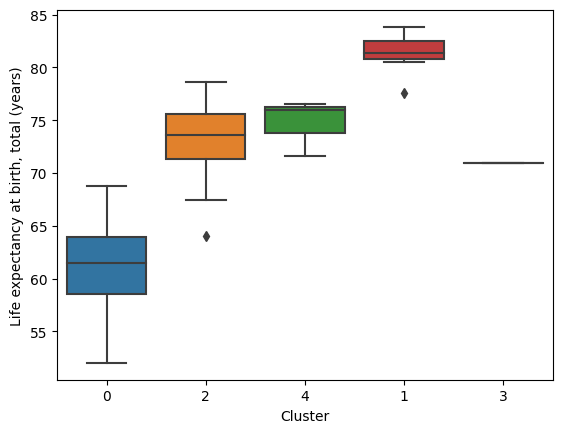

In [100]:
sns.boxplot(data = df_pivot_años_group_cluster , y = 'Life expectancy at birth, total (years)', x = 'Cluster')

<Axes: xlabel='Life expectancy at birth, total (years)', ylabel='Count'>

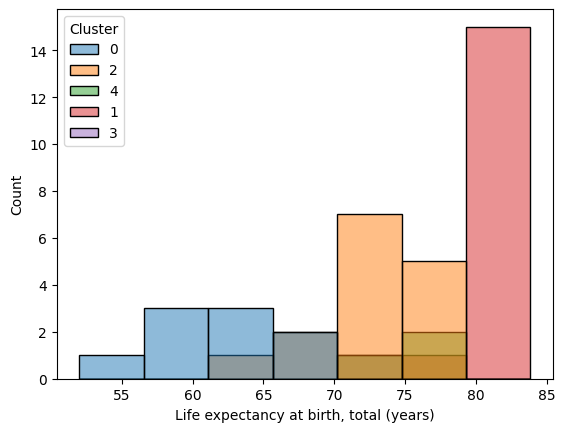

In [101]:
sns.histplot(data=df_pivot_años_group_cluster, x="Life expectancy at birth, total (years)", hue="Cluster")

<Axes: xlabel='Cluster', ylabel='GDP per capita (current US$)'>

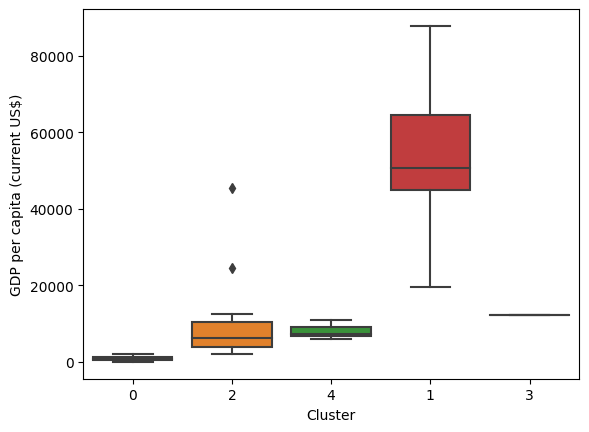

In [102]:
sns.boxplot(data = df_pivot_años_group_cluster , y = 'GDP per capita (current US$)', x = 'Cluster')

<Axes: xlabel='GDP per capita (current US$)', ylabel='Count'>

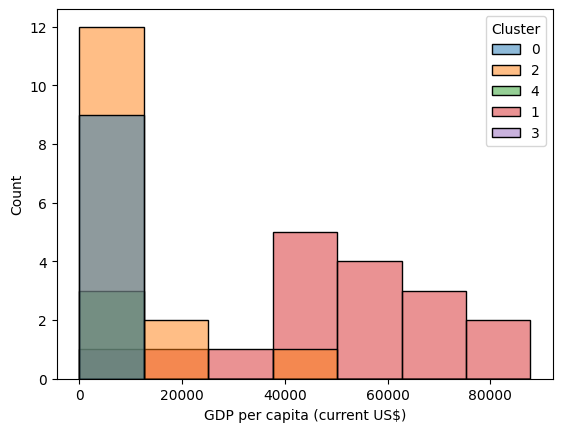

In [103]:
sns.histplot(data=df_pivot_años_group_cluster, x="GDP per capita (current US$)", hue="Cluster")

<Axes: xlabel='Cluster', ylabel='ratio_population ages 65 and above'>

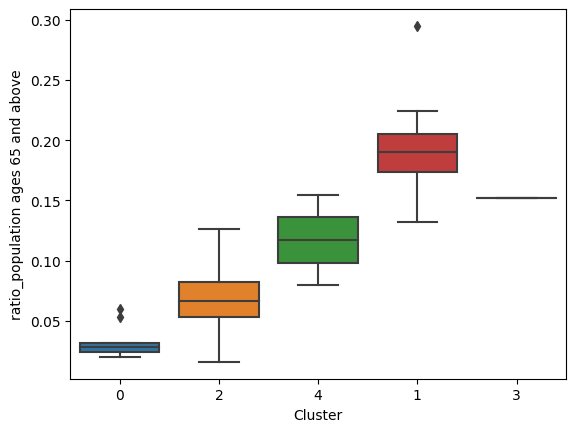

In [104]:
sns.boxplot(data = df_pivot_años_group_cluster , y = 'ratio_population ages 65 and above', x = 'Cluster')

<Axes: xlabel='ratio_population ages 65 and above', ylabel='Count'>

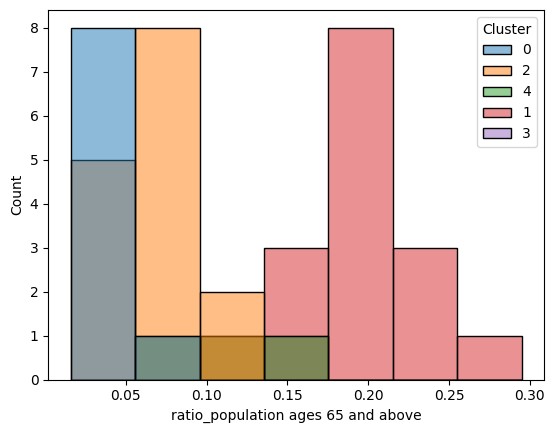

In [105]:
sns.histplot(data=df_pivot_años_group_cluster, x="ratio_population ages 65 and above", hue="Cluster")

<Axes: xlabel='Life expectancy at birth, total (years)', ylabel='GDP per capita (current US$)'>

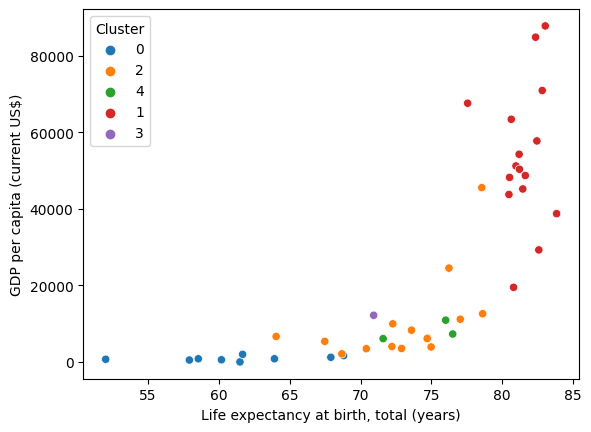

In [106]:
sns.scatterplot(data=df_pivot_años_group_cluster, x="Life expectancy at birth, total (years)", y="GDP per capita (current US$)", hue="Cluster")

In [107]:
df_pivot_años_group_cluster[df_pivot_años_group_cluster["Cluster"]=="1"]

Indicador,Pais,GDP per capita (current US$),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Population growth (annual %),ratio_population ages 65 and above,ratio_urban population,Urban population growth (annual %),Cluster
3,Australia,57761.211526,3.376449,2.765416,82.451958,1.095506,0.162611,0.862454,1.231012,1
4,Austria,51223.067832,2.572042,3.244945,80.976000,0.549274,0.192157,0.587622,0.945365,1
8,Canada,48719.347253,3.856999,3.026498,81.633581,1.264236,0.180586,0.815720,1.362825,1
14,Denmark,63418.244527,2.958327,2.308413,80.643918,0.473306,0.200320,0.881182,0.611848,1
18,Finland,50362.716042,2.308397,2.343310,81.221656,0.175927,0.224659,0.855244,0.259196,1
19,Germany,48228.360149,2.896613,2.652390,80.521260,0.341339,0.219553,0.774666,0.441269,1
20,Greece,19496.974134,1.720747,2.099946,80.806632,-0.352987,0.222021,0.797112,0.057636,1
22,Japan,38759.292507,0.319139,0.739445,83.845001,-0.293069,0.294953,0.917836,-0.201510,1
27,Netherlands,54275.378089,3.024227,3.657317,81.198326,0.656645,0.196396,0.922120,1.049998,1
28,New Zealand,45207.919349,3.463067,3.209167,81.455490,1.250193,0.156245,0.867050,1.346647,1


<h2>Gráfico de codo</h2>

In [108]:
valores = []

for i in range(2,11):

  modelo_kmeans_numcluster = KMeans(n_clusters = i, random_state = 123)
  modelo_kmeans_numcluster.fit(df_pivot_años_group_escaler)
  valores.append(modelo_kmeans_numcluster.inertia_)

C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

<Axes: >

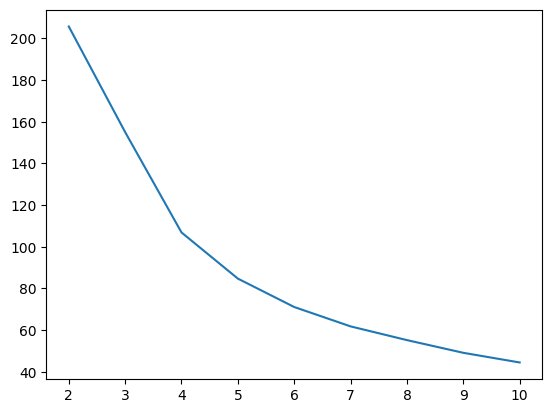

In [109]:
sns.lineplot(x = range(2,11), y = valores)

<h2>Coeficiente de silhoutte</h2>

In [110]:
from sklearn.metrics import silhouette_score, silhouette_samples

scores = []

for i in range(2,11):
  modelo_kmeans_numcluster = KMeans(n_clusters = i, random_state = 123)
  modelo_kmeans_numcluster.fit(df_pivot_años_group_escaler)
  etiquetas = modelo_kmeans_numcluster.labels_
  coef_silhouette = silhouette_score(df_pivot_años_group_escaler, etiquetas)
  scores.append(coef_silhouette)

C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

<Axes: >

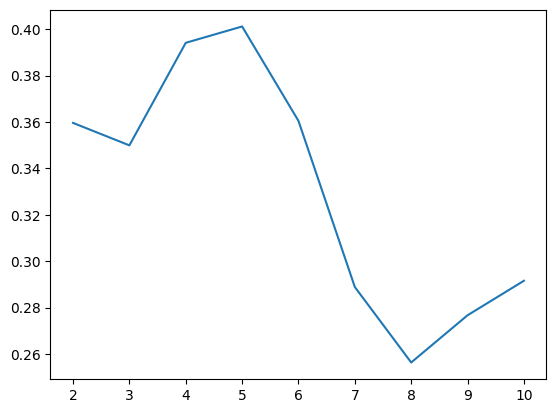

In [111]:
sns.lineplot(x = range(2,11), y = scores)